<a href="https://colab.research.google.com/github/eshalalam/turbo-human/blob/main/Carbon_Emissions_(B)_Research_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [97]:
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install seaborn
%pip install scikit-learn

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, model_selection, metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import *
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import *
from sklearn.feature_selection import SelectKBest

In [99]:
df = pd.read_csv('/content/SupplyChainGHGEmissionFactors_v1.3.0_NAICS_CO2e_USD2022 (2) (1).csv')

In [80]:
df.head()

,2017 NAICS Code,2017 NAICS Title,GHG,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Reference USEEIO Code
0,111110,Soybean Farming,All GHGs,"kg CO2e/2022 USD, purchaser price",0.488,0.044,0.532,1111A0
1,111120,Oilseed (except Soybean) Farming,All GHGs,"kg CO2e/2022 USD, purchaser price",0.488,0.044,0.532,1111A0
2,111130,Dry Pea and Bean Farming,All GHGs,"kg CO2e/2022 USD, purchaser price",0.809,0.040,0.848,1111B0
3,111140,Wheat Farming,All GHGs,"kg CO2e/2022 USD, purchaser price",0.809,0.040,0.848,1111B0
4,111150,Corn Farming,All GHGs,"kg CO2e/2022 USD, purchaser price",0.809,0.040,0.848,1111B0


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1016 entries, 0 to 1015
Data columns (total 8 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   2017 NAICS Code                                1016 non-null   int64  
 1   2017 NAICS Title                               1016 non-null   object 
 2   GHG                                            1016 non-null   object 
 3   Unit                                           1016 non-null   object 
 4   Supply Chain Emission Factors without Margins  1016 non-null   float64
 5   Margins of Supply Chain Emission Factors       1016 non-null   float64
 6   Supply Chain Emission Factors with Margins     1016 non-null   float64
 7   Reference USEEIO Code                          1016 non-null   object 
dtypes: float64(3), int64(1), object(4)
memory usage: 63.6+ KB


In [82]:
df.describe()

,2017 NAICS Code,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins
count,1016.000000,1016.000000,1016.000000,1016.000000
mean,424917.376969,0.264994,0.016945,0.281898
std,164942.113495,0.314768,0.023367,0.321417
min,111110.000000,0.026000,0.000000,0.029000
25%,325588.250000,0.103000,0.000000,0.108000
50%,423700.000000,0.159000,0.000000,0.173000
75%,532111.250000,0.302250,0.030250,0.329250
max,813990.000000,3.846000,0.125000,3.924000


In [83]:
df.isnull().sum()

,0
2017 NAICS Code,0
2017 NAICS Title,0
GHG,0
Unit,0
Supply Chain Emission Factors without Margins,0
Margins of Supply Chain Emission Factors,0
Supply Chain Emission Factors with Margins,0
Reference USEEIO Code,0


In [84]:
df.value_counts()

,,,,,,,,count
2017 NAICS Code,2017 NAICS Title,GHG,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Reference USEEIO Code,
813990,"Other Similar Organizations (except Business, Professional, Labor, and Political Organizations)",All GHGs,"kg CO2e/2022 USD, purchaser price",0.128,0.000,0.128,813B00,1
111110,Soybean Farming,All GHGs,"kg CO2e/2022 USD, purchaser price",0.488,0.044,0.532,1111A0,1
111120,Oilseed (except Soybean) Farming,All GHGs,"kg CO2e/2022 USD, purchaser price",0.488,0.044,0.532,1111A0,1
111130,Dry Pea and Bean Farming,All GHGs,"kg CO2e/2022 USD, purchaser price",0.809,0.040,0.848,1111B0,1
111140,Wheat Farming,All GHGs,"kg CO2e/2022 USD, purchaser price",0.809,0.040,0.848,1111B0,1
...,...,...,...,...,...,...,...,...
111331,Apple Orchards,All GHGs,"kg CO2e/2022 USD, purchaser price",0.429,0.059,0.488,111300,1
111320,Citrus (except Orange) Groves,All GHGs,"kg CO2e/2022 USD, purchaser price",0.429,0.059,0.488,111300,1
111310,Orange Groves,All GHGs,"kg CO2e/2022 USD, purchaser price",0.429,0.059,0.488,111300,1


Research Question:
Which industries have the highest and lowest carbon emissions per dollar of economic activity, and what patterns can be observed among them?

In [85]:
#Checking for duplicates
print(df.duplicated().sum())


0


In [105]:
# Cleaning column names
df = df.rename(columns={
    "Supply Chain Emission Factors with Margins": "Emissions_per_USD",
    "2017 NAICS Code": "NAICS_Code",
    "2017 NAICS Title": "Industry"
})

In [106]:
# Dropping unnecessary columns
columns_to_keep = ["NAICS_Code", "Industry", "Emissions_per_USD"]
df = df[columns_to_keep]
print(df.head())

   NAICS_Code                          Industry  Emissions_per_USD
0      111110                   Soybean Farming              0.532
1      111120  Oilseed (except Soybean) Farming              0.532
2      111130          Dry Pea and Bean Farming              0.848
3      111140                     Wheat Farming              0.848
4      111150                      Corn Farming              0.848


In [88]:
# Top 10 highest emitters
top_10_highest = df.sort_values("Emissions_per_USD", ascending=False).head(10)

In [89]:
# Top 10 highest and lowest emitters
highest_emissions = df.sort_values("Emissions_per_USD", ascending=False).head(10)
lowest_emissions = df.sort_values("Emissions_per_USD", ascending=True).head(10)
# Printting top 10 highest and lowest emitters
print("\nTop 10 Highest-Emitting Industries:")
print(highest_emissions[["Industry", "Emissions_per_USD"]])

print("\nTop 10 Lowest-Emitting Industries:")
print(lowest_emissions[["Industry", "Emissions_per_USD"]])




Top 10 Highest-Emitting Industries:
                                              Industry  Emissions_per_USD
285                               Cement Manufacturing              3.924
30                    Beef Cattle Ranching and Farming              2.893
33            Dual-Purpose Cattle Ranching and Farming              2.893
31                                     Cattle Feedlots              2.893
32                    Dairy Cattle and Milk Production              1.724
290                                 Lime Manufacturing              1.623
291                       Gypsum Product Manufacturing              1.623
653               Pipeline Transportation of Crude Oil              1.619
656                  All Other Pipeline Transportation              1.619
655  Pipeline Transportation of Refined Petroleum P...              1.619

Top 10 Lowest-Emitting Industries:
                                              Industry  Emissions_per_USD
744  Third Party Administration of Insu

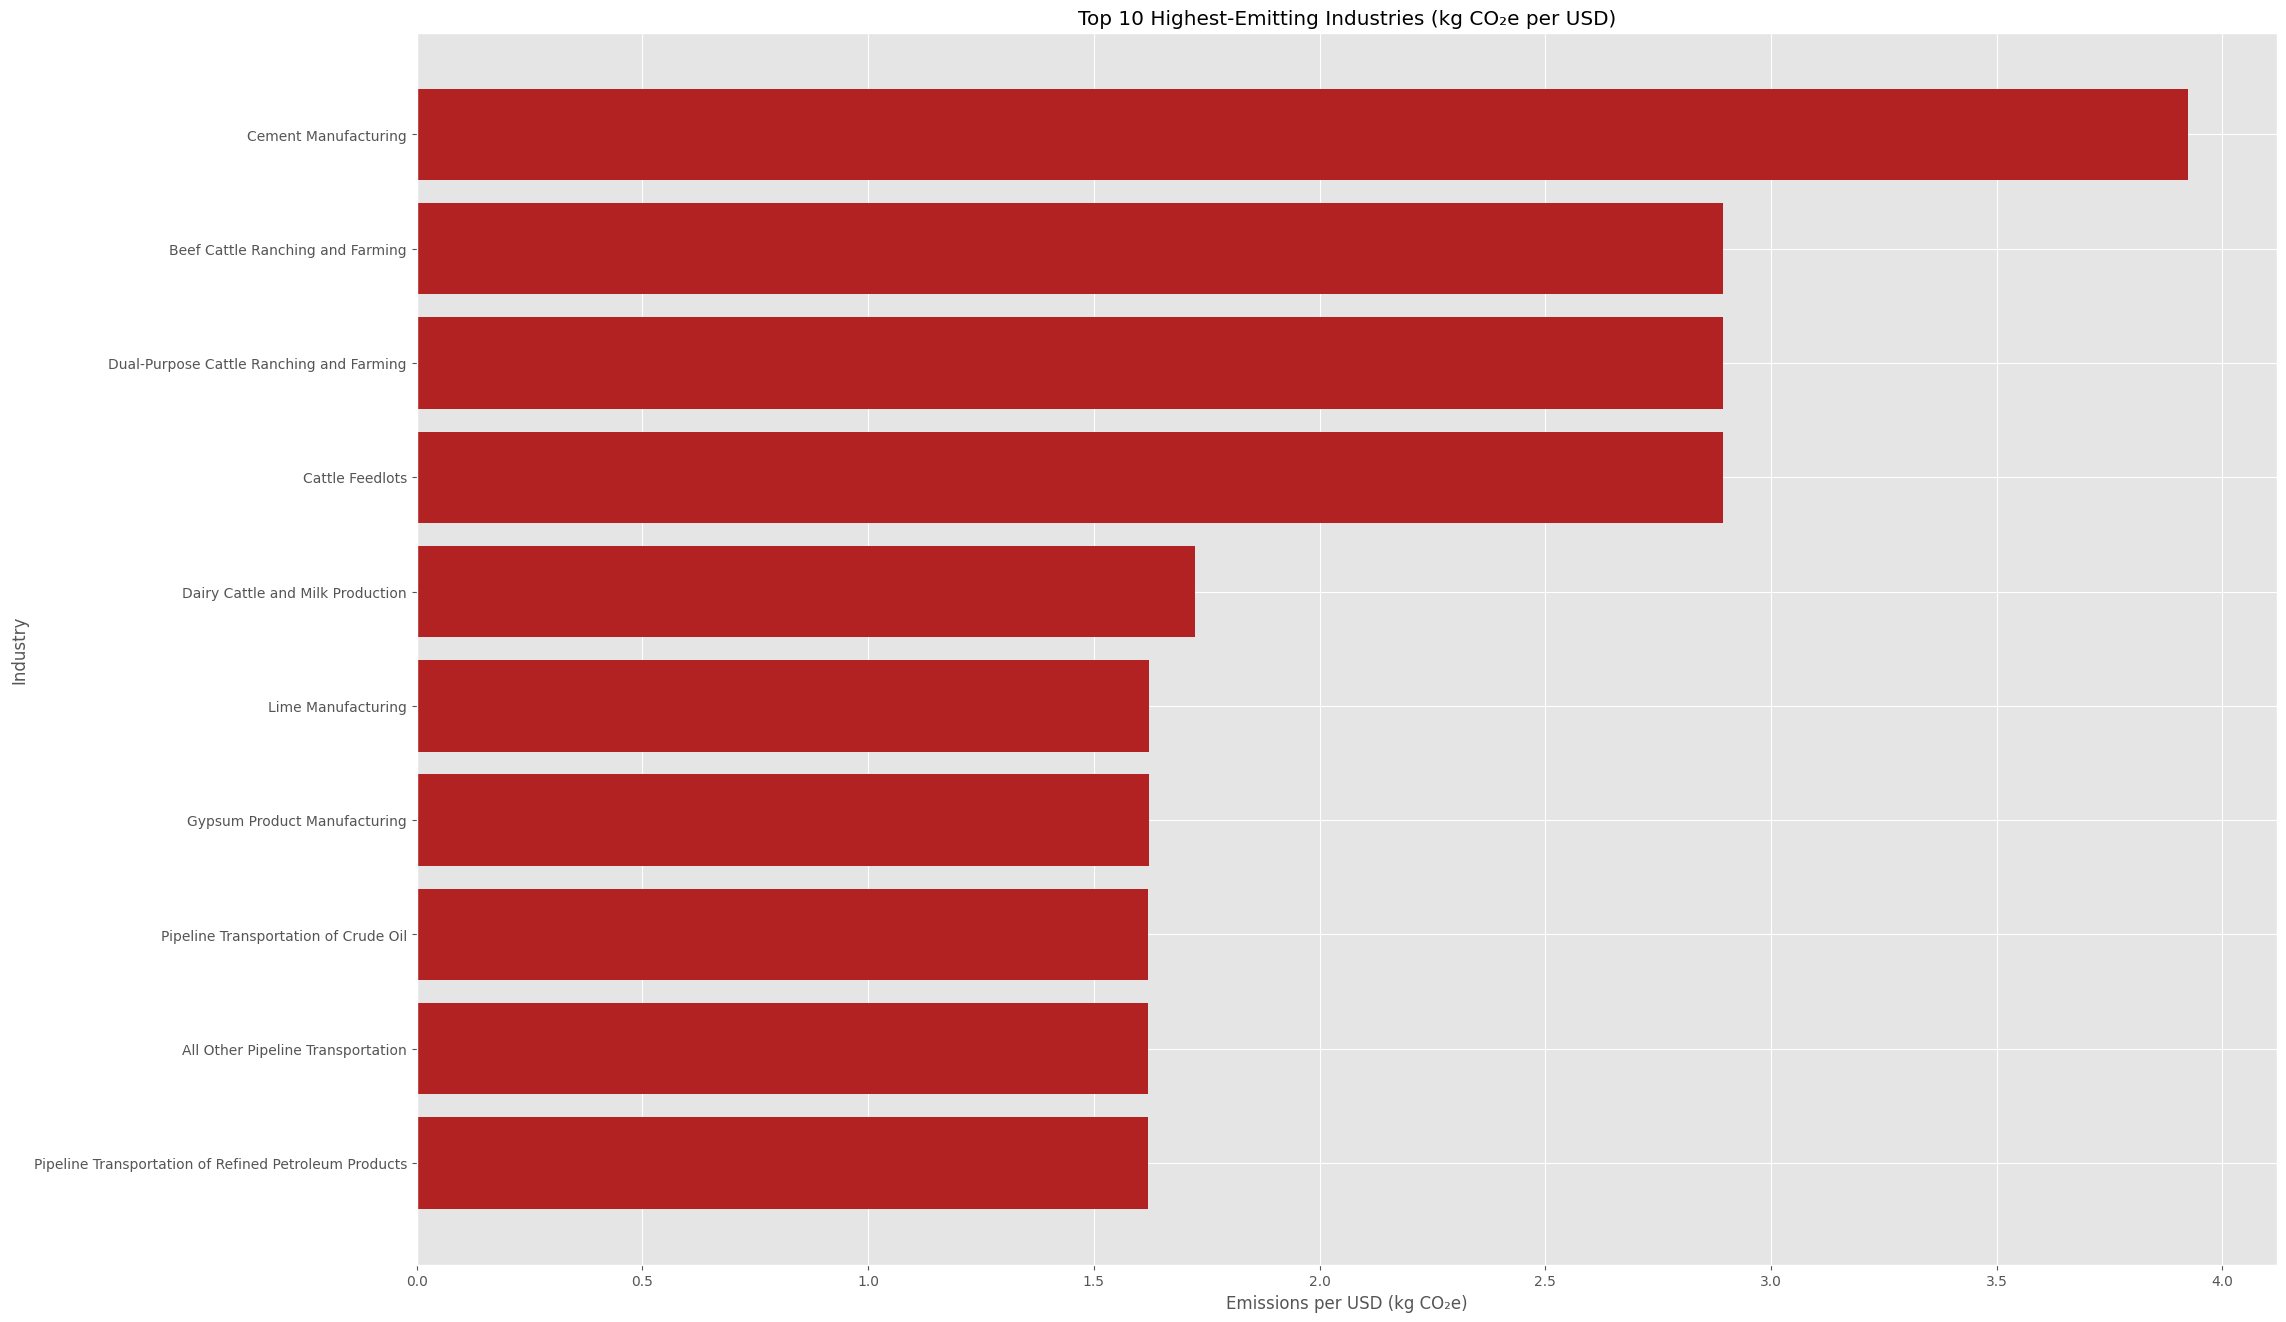

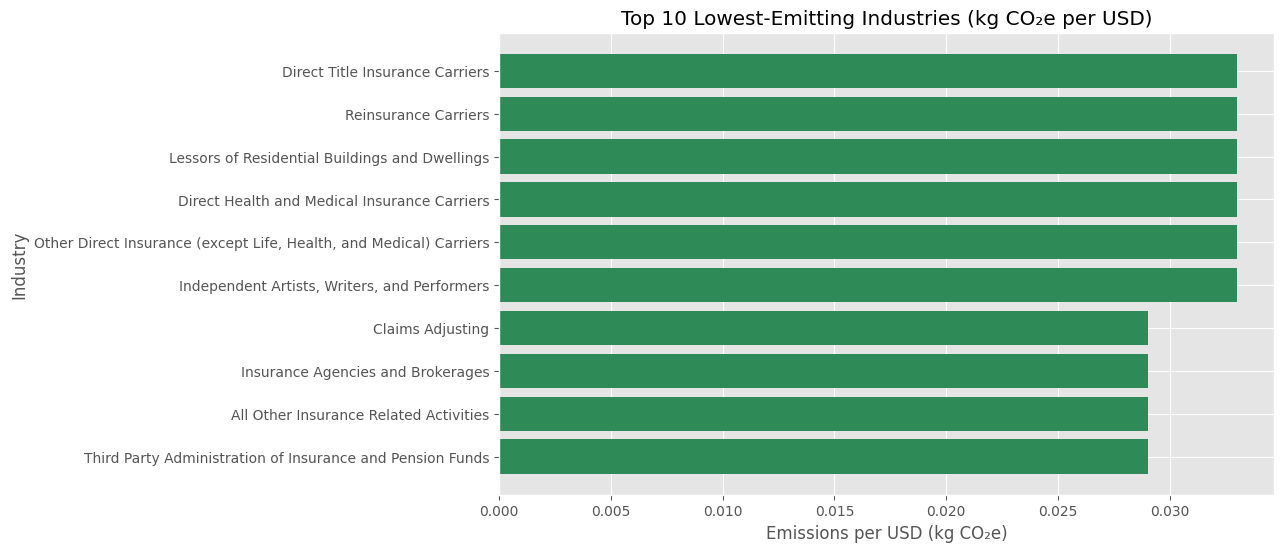

In [90]:
plt.style.use('ggplot')

# Plot Top 10 Highest Emitters
plt.figure(figsize=(24, 16))
plt.barh(highest_emissions["Industry"], highest_emissions["Emissions_per_USD"], color='firebrick')
plt.title("Top 10 Highest-Emitting Industries (kg CO₂e per USD)")
plt.xlabel("Emissions per USD (kg CO₂e)")
plt.ylabel("Industry")
plt.gca().invert_yaxis()  # Highest at top
plt.show()

# Plot Top 10 Lowest Emitters
plt.figure(figsize=(10, 6))
plt.barh(lowest_emissions["Industry"], lowest_emissions["Emissions_per_USD"], color='seagreen')
plt.title("Top 10 Lowest-Emitting Industries (kg CO₂e per USD)")
plt.xlabel("Emissions per USD (kg CO₂e)")
plt.ylabel("Industry")
plt.show()

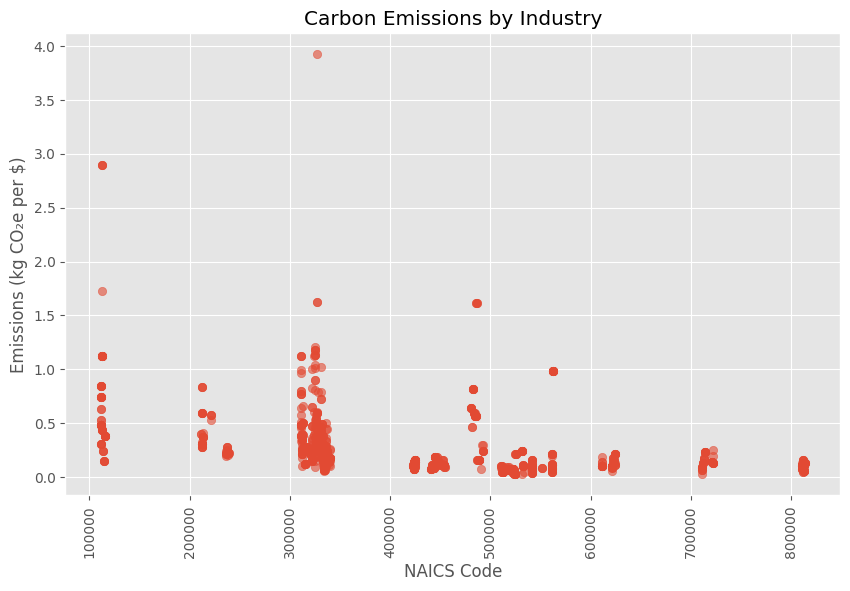

In [91]:
# Creating scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x=df["NAICS_Code"], y=df["Emissions_per_USD"], alpha=0.6)
plt.title("Carbon Emissions by Industry")
plt.xlabel("NAICS Code")
plt.ylabel("Emissions (kg CO₂e per $)")
plt.xticks(rotation=90)
plt.show()

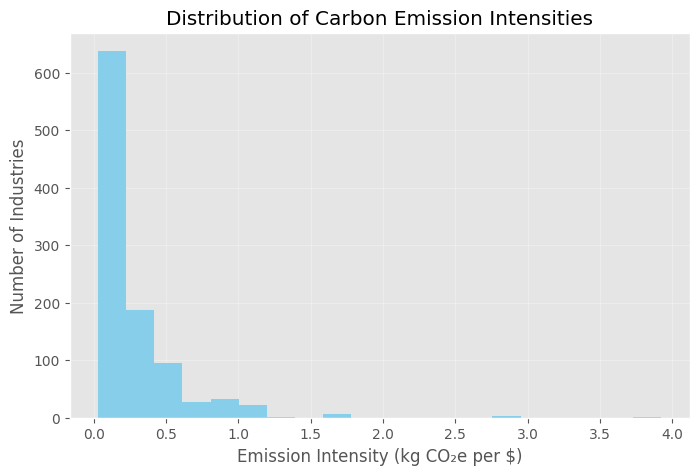

In [92]:
# Create histogram with Emission Factors with Margins
plt.figure(figsize=(8, 5))
emission_values1 = df["Emissions_per_USD"]
plt.hist(emission_values1, bins=20, color='skyblue')

plt.title("Distribution of Carbon Emission Intensities")
plt.xlabel("Emission Intensity (kg CO₂e per $)")
plt.ylabel("Number of Industries")
plt.grid(True, alpha=0.3)
plt.show()

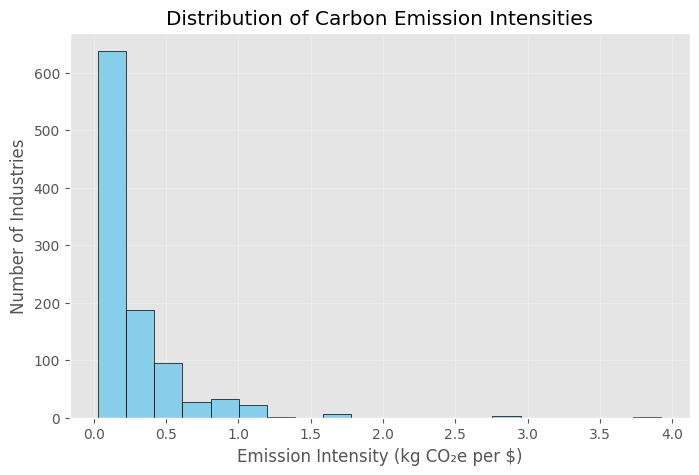

In [94]:
# Create histogram with Emission Factors without Margins
plt.figure(figsize=(8, 5))
emission_values2 = df["Emissions_per_USD"]
plt.hist(emission_values2, bins=20, color='skyblue', edgecolor='black')

plt.title("Distribution of Carbon Emission Intensities")
plt.xlabel("Emission Intensity (kg CO₂e per $)")
plt.ylabel("Number of Industries")
plt.grid(True, alpha=0.3)
plt.show()

<Figure size 1000x600 with 0 Axes>

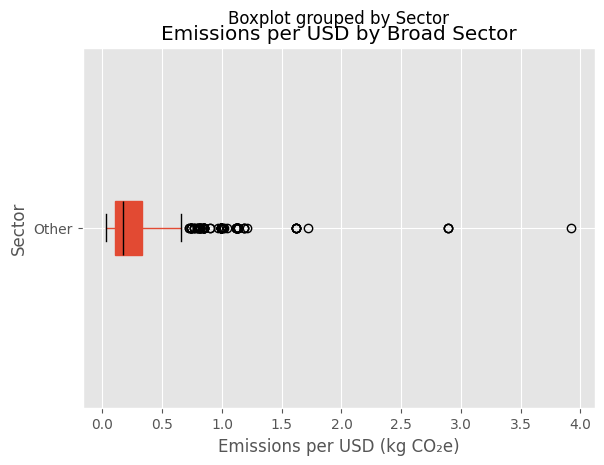

In [115]:
# Defining broad sectors based on NAICS codes
def categorize_sector(naics_code):
    code = int(naics_code)
    if 111 <= code <= 112: return "Agriculture"
    elif 311 <= code <= 339: return "Manufacturing"
    elif 481 <= code <= 486: return "Transportation"
    else: return "Other"

df["Sector"] = df["NAICS_Code"].apply(categorize_sector)

# Box plot by sector
plt.figure(figsize=(10, 6))
df.boxplot(column="Emissions_per_USD", by="Sector", vert=False, patch_artist=True, medianprops={'color': 'black'})
plt.title("Emissions per USD by Broad Sector")
plt.xlabel("Emissions per USD (kg CO₂e)")
plt.ylabel("Sector")
plt.show()

In [108]:
# Converting Categorical to Numerical
df_numeric = pd.get_dummies(df, columns=["Industry"], drop_first=True)

# Defining features, X and target, Y
X = df_numeric.drop(columns=["Emissions_per_USD"])  # Features
y = df_numeric["Emissions_per_USD"]                 # Target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
std_scaler = StandardScaler()
X_train_std = std_scaler.fit_transform(X_train)
X_test_std = std_scaler.transform(X_test)

from sklearn.neighbors import KNeighborsRegressor

model_unscaled = KNeighborsRegressor(n_neighbors=5)

model_unscaled.fit(X_train, y_train)

pred_unscaled = model_unscaled.predict(X_test)
print(mean_squared_error(y_test, pred_unscaled))

0.019299746470588235


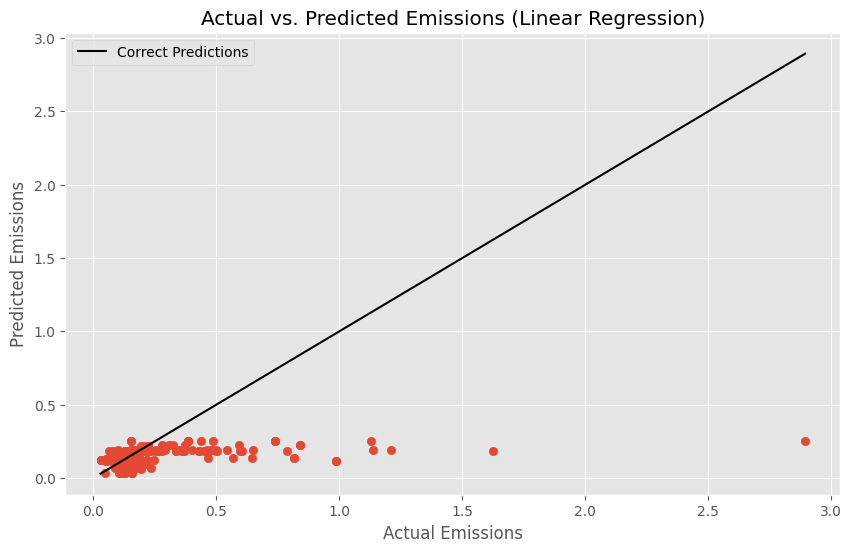

In [110]:
from sklearn.linear_model import LinearRegression

# Train linear regression
model_1 = LinearRegression()
model_1.fit(X_train, y_train)
y_pred = model_1.predict(X_test)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color = 'black', label='Correct Predictions')
plt.xlabel("Actual Emissions")
plt.ylabel("Predicted Emissions")
plt.title("Actual vs. Predicted Emissions (Linear Regression)")
plt.legend()
plt.show()

In [46]:
# Generating a summary table
summary_table = pd.concat([highest_emissions.head(5), lowest_emissions.head(5)], axis=0)

print("\nSummary Table: Highest and Lowest Emitters")
print(summary_table[["Industry", "Emissions_per_USD"]])

# Key observations
print("\nKey Observations:")
print("- Highest emitters: Cement manufacturing, cattle farming, and coal mining dominate.")
print("- Lowest emitters: Service sectors (e.g., software, consulting) have minimal emissions.")
print("- Manufacturing and agriculture are the most emission-intensive sectors.")


Summary Table: Highest and Lowest Emitters
                                              Industry  Emissions_per_USD
285                               Cement Manufacturing              3.924
30                    Beef Cattle Ranching and Farming              2.893
33            Dual-Purpose Cattle Ranching and Farming              2.893
31                                     Cattle Feedlots              2.893
32                    Dairy Cattle and Milk Production              1.724
744  Third Party Administration of Insurance and Pe...              0.029
745             All Other Insurance Related Activities              0.029
742                  Insurance Agencies and Brokerages              0.029
743                                   Claims Adjusting              0.029
938       Independent Artists, Writers, and Performers              0.033

Key Observations:
- Highest emitters: Cement manufacturing, cattle farming, and coal mining dominate.
- Lowest emitters: Service sectors (e.g